# imports 

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read csv file 

In [48]:
import pandas as pd
d=pd.read_csv("My Uber Drives - 2016.csv")
d

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# build the network

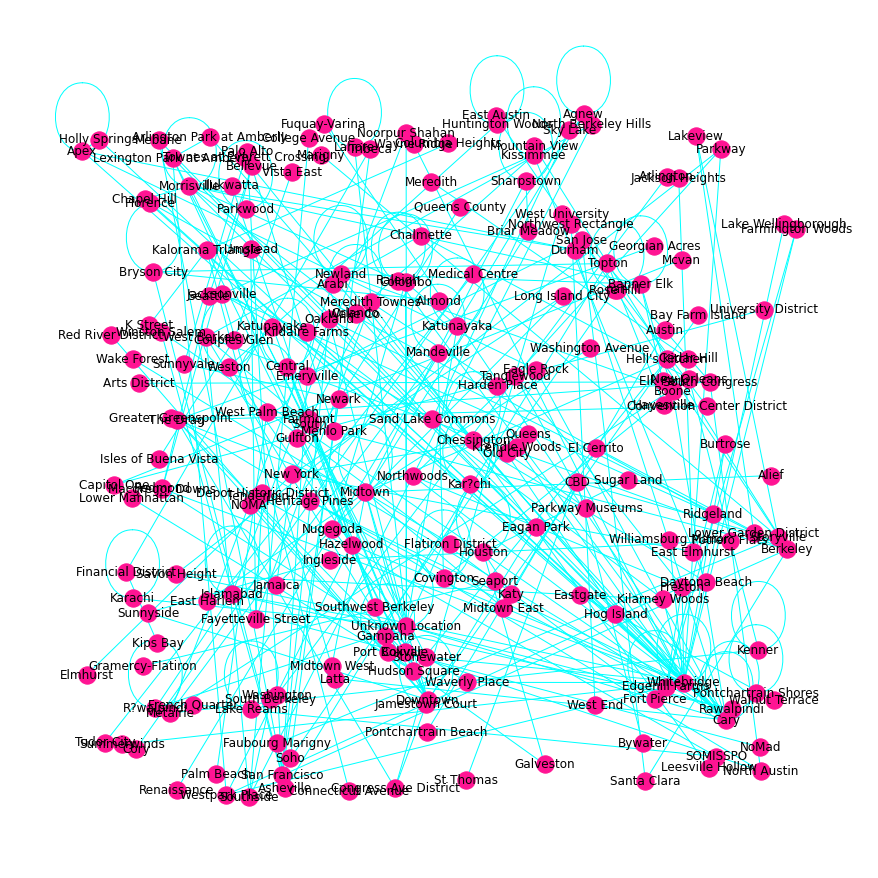

In [49]:
import networkx as nx
g = nx.Graph()
plt.figure(figsize=(12,12))
g= nx.from_pandas_edgelist(d,source='START*',target='STOP*')
nx.draw_random(g,with_labels=True,edge_color='aqua',node_color='deeppink')

# The Nodes 

In [4]:
print(g.nodes())

['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary', 'Morrisville', 'Jamaica', 'New York', 'Queens', 'Elmhurst', 'Midtown', 'East Harlem', 'NoMad', 'Flatiron District', 'Midtown East', 'Hudson Square', 'Lower Manhattan', "Hell's Kitchen", 'Queens County', 'Downtown', 'Gulfton', 'Houston', 'Eagan Park', 'Jamestown Court', 'Durham', 'Farmington Woods', 'Whitebridge', 'Lake Wellingborough', 'Raleigh', 'Fayetteville Street', 'Umstead', 'Hazelwood', 'Westpark Place', 'Fairmont', 'Meredith Townes', 'Leesville Hollow', 'Apex', 'Chapel Hill', 'Northwoods', 'Williamsburg Manor', 'Macgregor Downs', 'Edgehill Farms', 'Tanglewood', 'Preston', 'Eastgate', 'Walnut Terrace', 'East Elmhurst', 'Jackson Heights', 'Midtown West', 'Long Island City', 'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda', 'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge', 'Depot Historic District', 'Weston', 'East Austin', 'West University', 'South Congress', 'Arts District

# The Edges

In [5]:
print(g.edges())

[('Fort Pierce', 'Fort Pierce'), ('Fort Pierce', 'West Palm Beach'), ('West Palm Beach', 'West Palm Beach'), ('West Palm Beach', 'Palm Beach'), ('Cary', 'Cary'), ('Cary', 'Morrisville'), ('Cary', 'Durham'), ('Cary', 'Raleigh'), ('Cary', 'Apex'), ('Cary', 'Chapel Hill'), ('Cary', 'Latta'), ('Cary', 'Florence'), ('Cary', 'Holly Springs'), ('Cary', 'Boone'), ('Cary', 'Wake Forest'), ('Cary', 'Eagle Rock'), ('Cary', 'Winston Salem'), ('Cary', 'Mebane'), ('Cary', 'Unknown Location'), ('Cary', 'Wake Co.'), ('Cary', 'Fuquay-Varina'), ('Morrisville', 'Raleigh'), ('Morrisville', 'Durham'), ('Morrisville', 'Chapel Hill'), ('Morrisville', 'Morrisville'), ('Morrisville', 'Banner Elk'), ('Morrisville', 'Unknown Location'), ('Morrisville', 'Wake Co.'), ('Jamaica', 'New York'), ('Jamaica', 'Long Island City'), ('New York', 'Queens'), ('New York', 'Elmhurst'), ('New York', 'Queens County'), ('New York', 'East Elmhurst'), ('New York', 'Long Island City'), ('Midtown', 'East Harlem'), ('Midtown', 'Flatir

# # OF NODES AND EDGES

In [6]:
print(nx.info(g))

Graph with 210 nodes and 281 edges


# Is this graph directed or not ??

In [7]:
g.is_directed()

False

# The sum of all degree

In [51]:
sum(dict(g.degree()).values())/float(len(g))

2.676190476190476

# The averge degree

In [9]:
degree=g.degree()
degree_list=[]
for(n,d) in degree:
    degree_list.append(d)
av_degree=sum(degree_list)/len(degree_list)
print('The averge degree is : '+str(av_degree))

The averge degree is : 2.676190476190476


# Degree Distribution and Averge Degree Graph

Text(0.5, 1.0, 'Node degree')

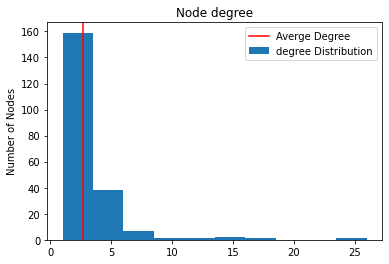

In [10]:
plt.hist(degree_list,label='degree Distribution')
plt.axvline(av_degree,color='r',label='Averge Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Node degree')

# Degree Distribution Graph

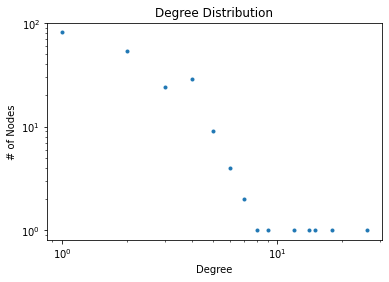

In [11]:
from matplotlib import pyplot as plt
hist = nx.degree_histogram(g)  

plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.loglog()
plt.show()

# Degree Centrality 

In [12]:
nx.degree_centrality(g)

{'Fort Pierce': 0.014354066985645932,
 'West Palm Beach': 0.019138755980861243,
 'Palm Beach': 0.004784688995215311,
 'Cary': 0.08612440191387559,
 'Morrisville': 0.043062200956937795,
 'Jamaica': 0.009569377990430622,
 'New York': 0.028708133971291863,
 'Queens': 0.004784688995215311,
 'Elmhurst': 0.004784688995215311,
 'Midtown': 0.06698564593301436,
 'East Harlem': 0.009569377990430622,
 'NoMad': 0.004784688995215311,
 'Flatiron District': 0.004784688995215311,
 'Midtown East': 0.004784688995215311,
 'Hudson Square': 0.014354066985645932,
 'Lower Manhattan': 0.004784688995215311,
 "Hell's Kitchen": 0.009569377990430622,
 'Queens County': 0.004784688995215311,
 'Downtown': 0.057416267942583726,
 'Gulfton': 0.004784688995215311,
 'Houston': 0.023923444976076555,
 'Eagan Park': 0.004784688995215311,
 'Jamestown Court': 0.014354066985645932,
 'Durham': 0.014354066985645932,
 'Farmington Woods': 0.009569377990430622,
 'Whitebridge': 0.12440191387559808,
 'Lake Wellingborough': 0.00478468

# Graph for Degree Centrality

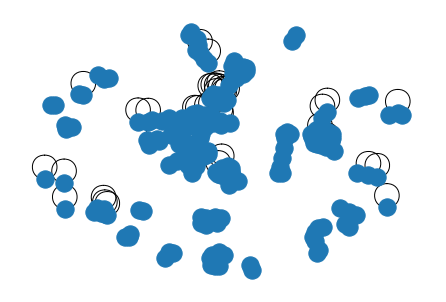

In [13]:
degree_centrality = nx.degree_centrality(g)
nx.draw(g)

# degree assortativity

In [14]:
nx.degree_assortativity_coefficient(g)

-0.11528834961654225

# Closeness Centrality

In [15]:
closeness = nx.closeness_centrality(g)
closeness

{'Fort Pierce': 0.006379585326953747,
 'West Palm Beach': 0.009569377990430622,
 'Palm Beach': 0.006379585326953747,
 'Cary': 0.10636731689363269,
 'Morrisville': 0.09218500797448166,
 'Jamaica': 0.0180345969819654,
 'New York': 0.02930622009569378,
 'Queens': 0.01674641148325359,
 'Elmhurst': 0.01674641148325359,
 'Midtown': 0.09215510366826156,
 'East Harlem': 0.06505066141289051,
 'NoMad': 0.049701628944680394,
 'Flatiron District': 0.06410789820400804,
 'Midtown East': 0.06410789820400804,
 'Hudson Square': 0.06553251816409711,
 'Lower Manhattan': 0.04998242910820966,
 "Hell's Kitchen": 0.06505066141289051,
 'Queens County': 0.01674641148325359,
 'Downtown': 0.11058612440191387,
 'Gulfton': 0.07251549141109107,
 'Houston': 0.017088174982911826,
 'Eagan Park': 0.004784688995215311,
 'Jamestown Court': 0.004784688995215311,
 'Durham': 0.07634954648193266,
 'Farmington Woods': 0.062286397812713605,
 'Whitebridge': 0.11251736379070845,
 'Lake Wellingborough': 0.061193653991437925,
 'Ra

# Closeness Centrality for "Houston"

In [16]:
closeness_centrality = nx.closeness_centrality(g,'Houston')
closeness_centrality

0.017088174982911826

# Betweenness Centrality

In [17]:
betweenness = nx.betweenness_centrality(g)
betweenness

{'Fort Pierce': 0.0,
 'West Palm Beach': 4.6006624953993374e-05,
 'Palm Beach': 0.0,
 'Cary': 0.03785578456631088,
 'Morrisville': 0.006295239847871426,
 'Jamaica': 0.0,
 'New York': 0.0008741258741258741,
 'Queens': 0.0,
 'Elmhurst': 0.0,
 'Midtown': 0.02130106735369893,
 'East Harlem': 0.0019322782480677217,
 'NoMad': 0.0,
 'Flatiron District': 0.0,
 'Midtown East': 0.0,
 'Hudson Square': 0.0019322782480677217,
 'Lower Manhattan': 0.0,
 "Hell's Kitchen": 0.0,
 'Queens County': 0.0,
 'Downtown': 0.03358483621641516,
 'Gulfton': 0.0,
 'Houston': 0.000368052999631947,
 'Eagan Park': 0.0,
 'Jamestown Court': 0.0,
 'Durham': 5.367439577965893e-05,
 'Farmington Woods': 0.0,
 'Whitebridge': 0.014285057048214943,
 'Lake Wellingborough': 0.0,
 'Raleigh': 0.0,
 'Fayetteville Street': 0.00041405962458594036,
 'Umstead': 0.0,
 'Hazelwood': 0.0023003312476996686,
 'Westpark Place': 9.201324990798675e-05,
 'Fairmont': 0.0,
 'Meredith Townes': 0.0005520794994479205,
 'Leesville Hollow': 0.0,
 'Apex

# Harmonic Centrality

In [18]:
harmonic = nx.harmonic_centrality(g)
harmonic

{nan: 0,
 'Capitol One': 2.0,
 'Sugar Land': 2.6666666666666665,
 'Lexington Park at Amberly': 15.666666666666668,
 'French Quarter': 1.5,
 'Financial District': 2.833333333333333,
 'University District': 1.5,
 'NOMA': 16.33333333333334,
 'Chessington': 14.083333333333332,
 'Central': 19.250000000000004,
 'Tudor City': 1.0,
 'Farmington Woods': 13.916666666666666,
 'Whitebridge': 25.333333333333332,
 'Covington': 3.8333333333333335,
 'Washington Avenue': 15.133333333333335,
 'Sunnyside': 17.250000000000004,
 'Morrisville': 24.05,
 'Palo Alto': 14.446428571428564,
 'Newark': 14.446428571428564,
 'North Berkeley Hills': 13.916666666666668,
 'Holly Springs': 18.499999999999993,
 'New York': 6.5,
 'Metairie': 5.0,
 'R?walpindi': 18.0,
 'Katy': 3.3333333333333335,
 'Gulfton': 16.33333333333334,
 'Greater Greenspoint': 15.133333333333335,
 'NoMad': 11.633333333333326,
 'Weston': 10.75,
 'Hudson Square': 16.3,
 'Emeryville': 17.678571428571423,
 "Hell's Kitchen": 15.800000000000002,
 'St Thom

# Find the neighbors for 'Fort Pierce'

In [19]:
list(g.neighbors('Fort Pierce')) # obtain the list of neighobors for node 0

['Fort Pierce', 'West Palm Beach']

# Connected Components Length

In [20]:
#size of largest connected components 
largest_cc=max(nx.connected_components(g),key=len)
print(len(largest_cc))

52


# Connected Components Graph

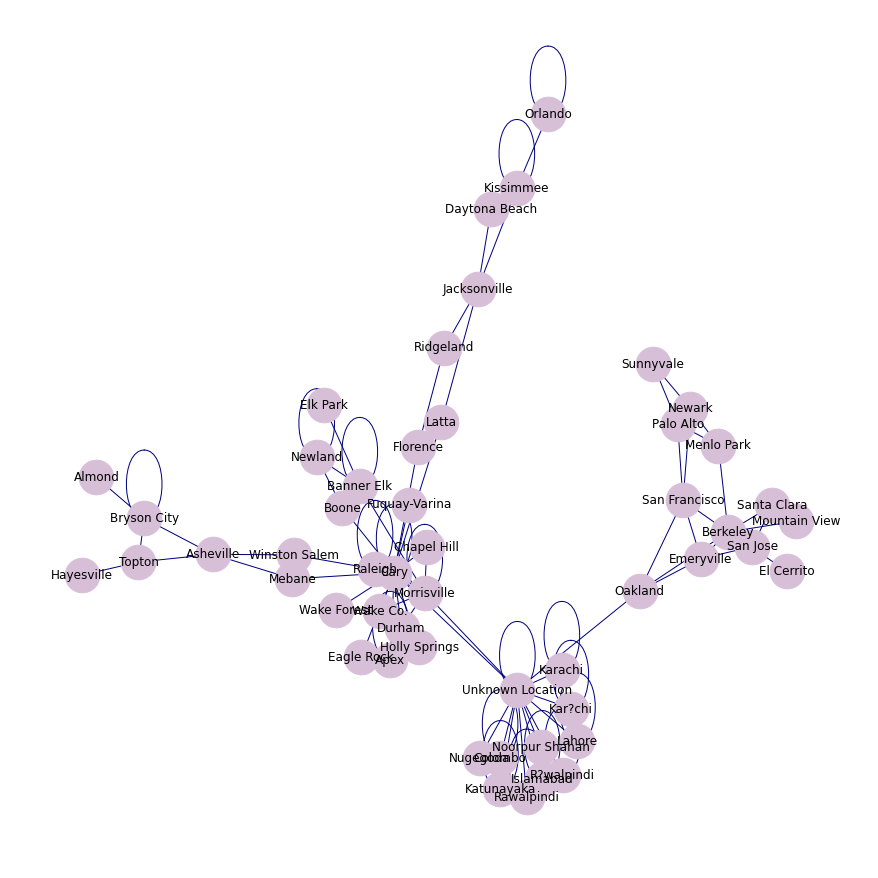

In [21]:
comps = list(nx.connected_components(g)) # get a list of connected components (for decreasing size)
comp_1 = nx.subgraph(g, comps[1]) # build a subgraph on the second component
plt.figure(figsize=(12,12))
nx.draw(comp_1,node_size=1200,with_labels=True, edge_color='navy',node_color='thistle')

# Diameter

In [22]:
nx.diameter(g.subgraph(comps[0])) 

2

# Global Clustering

In [ ]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.5

# Average for shortest path

In [ ]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 125.37537537537537

# Density

In [26]:
density=nx.density(g)
print('the edge density is: '+str(density))

the edge density is: 0.012804739120528595


# Clustring

In [27]:
print(nx.clustering(g))

{'Fort Pierce': 0, 'West Palm Beach': 0, 'Palm Beach': 0, 'Cary': 0.06666666666666667, 'Morrisville': 0.23809523809523808, 'Jamaica': 1.0, 'New York': 0.06666666666666667, 'Queens': 0, 'Elmhurst': 0, 'Midtown': 0.030303030303030304, 'East Harlem': 0, 'NoMad': 0, 'Flatiron District': 0, 'Midtown East': 0, 'Hudson Square': 0.3333333333333333, 'Lower Manhattan': 0, "Hell's Kitchen": 1.0, 'Queens County': 0, 'Downtown': 0.06060606060606061, 'Gulfton': 0, 'Houston': 0, 'Eagan Park': 0, 'Jamestown Court': 0, 'Durham': 0.6666666666666666, 'Farmington Woods': 1.0, 'Whitebridge': 0.06521739130434782, 'Lake Wellingborough': 0, 'Raleigh': 1.0, 'Fayetteville Street': 0, 'Umstead': 0, 'Hazelwood': 0.5, 'Westpark Place': 0.6666666666666666, 'Fairmont': 0, 'Meredith Townes': 0, 'Leesville Hollow': 0, 'Apex': 0.5, 'Chapel Hill': 1.0, 'Northwoods': 1.0, 'Williamsburg Manor': 0, 'Macgregor Downs': 1.0, 'Edgehill Farms': 0.4, 'Tanglewood': 0.6666666666666666, 'Preston': 0.5, 'Eastgate': 0, 'Walnut Terrac

# Length for Clustering

In [28]:
print(len(nx.clustering(g)))

210


# Local Clustring Coefficient Graph

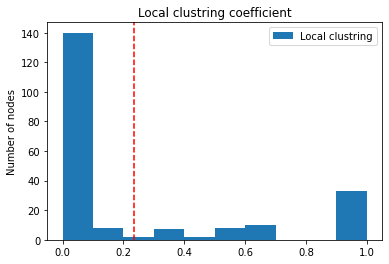

In [29]:
local_clustring_coefficient=nx.algorithms.cluster.clustering(g)
av_local_clustring_coefficient=sum(local_clustring_coefficient.values())/len(local_clustring_coefficient)
plt.hist(local_clustring_coefficient.values(),label='Local clustring')
plt.axvline(av_local_clustring_coefficient,color='r',linestyle='dashed')
plt.legend()
plt.ylabel('Number of nodes')
plt.title('Local clustring coefficient')
plt.show()

# Number of triangle

In [30]:
print('Number of trianglr is: ',len(nx.triangles(g)))

Number of trianglr is:  210


# Duplicated Values In The Dataset

In [ ]:
dup_data=data.duplicated().any()
print("Are there any duplicate values?",dup_data)

Are there any duplicate values? True

# In Degree and Out Degree 

In [33]:
in_deg_centrality = nx.in_degree_centrality(g)
out_deg_centrality = nx.out_degree_centrality(g)

NetworkXNotImplemented: not implemented for undirected type

# Erdos Renyi Graph

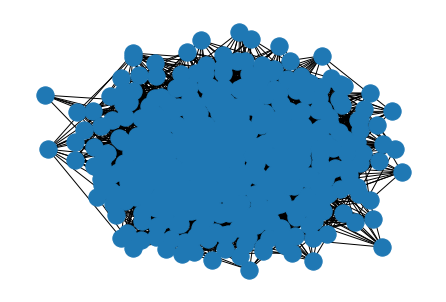

In [34]:
abd = nx.erdos_renyi_graph(400, 0.05)
nx.draw(abd)

# Watts Strogatz Graph

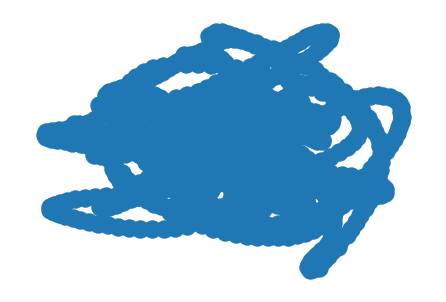

In [36]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(1000, k=4, p=0)
nx.draw(ws)